## Imports and Data Upload

In [ ]:
import numpy as np
import seaborn as sns
# from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import image

import os
from os import listdir
import zipfile
from google.colab import drive

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random
import glob
import shutil

Load in Image Files

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_Length = 32

batch_size = X_Length
img_height = 256
img_width = 256
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/Faces/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 2045 files belonging to 2 classes.


##Overfit Model Comparisons

###Model Creation

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x0 = layers.Rescaling(1./255)(inputs)
x0 = layers.Conv2D(filters=1, kernel_size=3, activation="relu")(x0)
x0 =layers.Flatten()(x0)
outputs = layers.Dense(1, activation="sigmoid")(x0)
model0 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x1 = layers.Rescaling(1./255)(inputs)
x1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x1)
x1 =layers.MaxPooling2D(pool_size=2)(x1)
x1 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x1)
x1 =layers.MaxPooling2D(pool_size=2)(x1)
x1 =layers.Flatten()(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model1 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x2 = layers.Rescaling(1./255)(inputs)
x2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x2)
x2 =layers.MaxPooling2D(pool_size=2)(x2)
x2 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x2)
x2 =layers.MaxPooling2D(pool_size=2)(x2)
x2 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x2)
x2 =layers.Flatten()(x2)
outputs = layers.Dense(1, activation="sigmoid")(x2)
model2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x3 = layers.Rescaling(1./255)(inputs)
x3 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x3)
x3 =layers.Flatten()(x3)
outputs = layers.Dense(1, activation="sigmoid")(x3)
model3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x4 = layers.Rescaling(1./255)(inputs)
x4 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=2, kernel_size=3, activation="relu")(x4)
x4 =layers.Flatten()(x4)
outputs = layers.Dense(1, activation="sigmoid")(x4)
model4 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x5 = layers.Rescaling(1./255)(inputs)
x5 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x5)
x5 = layers.Conv2D(filters=2, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=2, kernel_size=3, activation="relu")(x5)
x5 =layers.Flatten()(x5)
outputs = layers.Dense(1, activation="sigmoid")(x5)
model5 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model0.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model1.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model3.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model4.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model5.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

###Model Training

In [ ]:
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

In [ ]:
history0 = model0.fit(train_ds, epochs=128, batch_size = 16, callbacks=earlyStop)
history1 = model1.fit(train_ds, epochs=128, batch_size = 16, callbacks=earlyStop)
history2 = model2.fit(train_ds, epochs=128, batch_size = 16, callbacks=earlyStop)
history3 = model3.fit(train_ds, epochs=128, batch_size = 16, callbacks=earlyStop)
history4 = model4.fit(train_ds, epochs=128, batch_size = 16, callbacks=earlyStop)
history5 = model5.fit(train_ds, epochs=128, batch_size = 16, callbacks=earlyStop)

###Model Evaluation

In [ ]:
def learning_curve (history):
  fig, axs = plt.subplots(1, 2, constrained_layout= True)
  axs[0].set_ylim(-0.1, 1.10)
  axs[1].set_ylim(-0.1, 1.10)
  fig.suptitle('Training Performance')
  axs[0].plot(history.history['accuracy']) 
  axs[0].set_title('Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')

  axs[1].plot(history.history['loss'])
  axs[1].set_title('Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  plt.show()

In [ ]:
def model_accuracy (X, Y, model, prediction):
  scores = model.evaluate(X, Y)
  for i in range(len(scores)):
    print("%s: %.3f%%" % (model.metrics_names[i], scores[i]*100))

  accuracy = accuracy_score(Y, prediction.round()) * 100
  precision = precision_score(Y, prediction.round()) * 100
  recall = recall_score(Y, prediction.round()) * 100
  f1score = f1_score(Y, prediction.round())
  
  print("Accuracy Score: %.3s%%" % (accuracy))
  print("Precision Score: %.3s%%" % (precision))
  print("Recall Score: %.3s%%" % (recall))
  print("F1 Score: %.3s" % (f1score))

In [ ]:
models = [model0, model1, model2, model3, model4, model5]

In [ ]:
i = 0
for model in models:
  trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
  nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
  totalParams = trainableParams + nonTrainableParams
  print("Number of Parameters in Model", i, ":", int(totalParams))
  i += 1

Number of Parameters in Model 0 : 64545
Number of Parameters in Model 1 : 17429
Number of Parameters in Model 2 : 17901
Number of Parameters in Model 3 : 9385
Number of Parameters in Model 4 : 7335
Number of Parameters in Model 5 : 3199


Split into images and labels for evaluation

In [ ]:
#batch size must be the entire dataset
X_Length = 2045

batch_size = X_Length
img_height = 256
img_width = 256
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/Faces/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch_size)

for images, labels in train_ds.take(1):
  xtrain = images.numpy()
  ytrain = labels.numpy()
print(ytrain.shape)
print(xtrain.shape)

Found 2045 files belonging to 2 classes.
(2045,)
(2045, 256, 256, 3)


Model0:
64/64 [==============================] - 1s 11ms/step - loss: 0.2145 - accuracy: 0.9232
loss: 21.446%
accuracy: 92.323%
Accuracy Score: 92.%
Precision Score: 100%
Recall Score: 88.%
F1 Score: 0.9


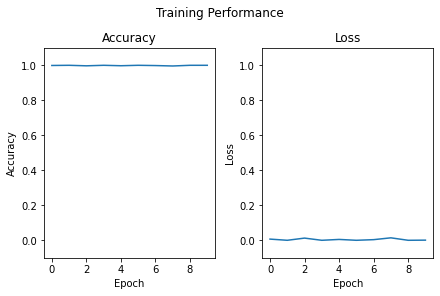

In [ ]:
prediction = model0.predict(xtrain)
print("Model0:")
model_accuracy(xtrain, ytrain, model0, prediction)
learning_curve(history0)

Model1:
64/64 [==============================] - 1s 14ms/step - loss: 0.0019 - accuracy: 0.9995
loss: 0.192%
accuracy: 99.951%
Accuracy Score: 99.%
Precision Score: 100%
Recall Score: 99.%
F1 Score: 0.9


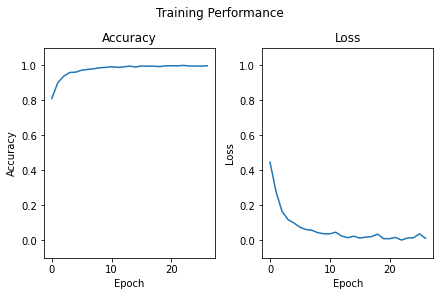

In [ ]:
prediction = model1.predict(xtrain)
print("Model1:")
model_accuracy(xtrain, ytrain, model1, prediction)
learning_curve(history1)

Model2:
64/64 [==============================] - 1s 14ms/step - loss: 7.8842e-05 - accuracy: 1.0000
loss: 0.008%
accuracy: 100.000%
Accuracy Score: 100%
Precision Score: 100%
Recall Score: 100%
F1 Score: 1.0


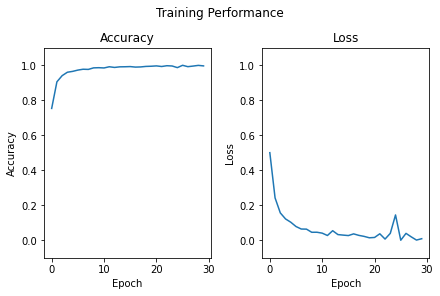

In [ ]:
prediction = model2.predict(xtrain)
print("Model2:")
model_accuracy(xtrain, ytrain, model2, prediction)
learning_curve(history2)

Model3:
64/64 [==============================] - 1s 15ms/step - loss: 7.5329e-04 - accuracy: 1.0000
loss: 0.075%
accuracy: 100.000%
Accuracy Score: 100%
Precision Score: 100%
Recall Score: 100%
F1 Score: 1.0


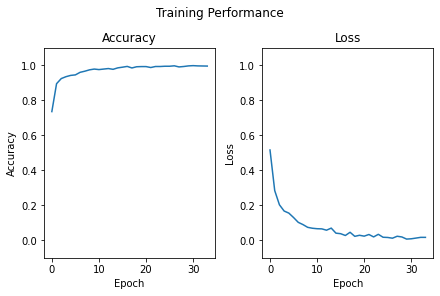

In [ ]:
prediction = model3.predict(xtrain)
print("Model3:")
model_accuracy(xtrain, ytrain, model3, prediction)
learning_curve(history3)

Model4:
64/64 [==============================] - 1s 15ms/step - loss: 0.0136 - accuracy: 0.9966
loss: 1.363%
accuracy: 99.658%
Accuracy Score: 99.%
Precision Score: 99.%
Recall Score: 99.%
F1 Score: 0.9


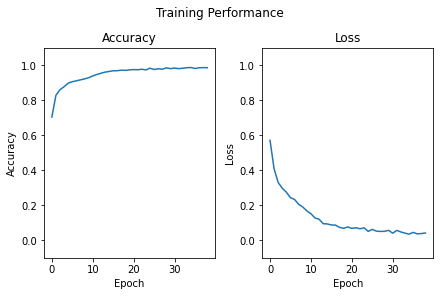

In [ ]:
prediction = model4.predict(xtrain)
print("Model4:")
model_accuracy(xtrain, ytrain, model4, prediction)
learning_curve(history4)

Model5:
64/64 [==============================] - 1s 13ms/step - loss: 0.0055 - accuracy: 0.9980
loss: 0.549%
accuracy: 99.804%
Accuracy Score: 99.%
Precision Score: 99.%
Recall Score: 99.%
F1 Score: 0.9


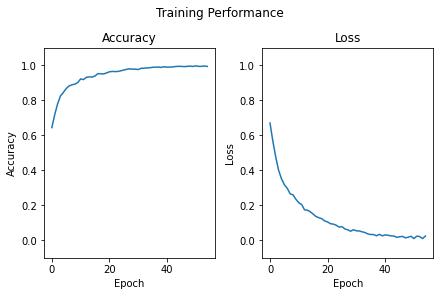

In [ ]:
prediction = model5.predict(xtrain)
print("Model5:")
model_accuracy(xtrain, ytrain, model5, prediction)
learning_curve(history5)

##Output as Additional Input

In [ ]:
N=X_Length

xtrain_with_labels = np.zeros((N, img_height, img_width, 4))

for i in range(X_Length):
  existing = xtrain[i, :, :, :]
  newchannel = np.full((img_height, img_width), ytrain[i]).reshape(img_height, img_width, 1)
  x = np.concatenate((existing, newchannel), axis = -1)
  xtrain_with_labels[i] = x

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 4))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)
x =layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x)
x =layers.MaxPooling2D(pool_size=2)(x)
x =layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
modelWithLabels = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
modelWithLabels.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
modelWithLabels.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 4)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 256, 256, 4)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 254, 254, 4)       148       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 4)       148       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 4)        0         
 g2D)                                                      

In [ ]:
historyWithLabels = modelWithLabels.fit(xtrain_with_labels, ytrain, epochs=8, batch_size= 16)

Epoch 1/8
128/128 [==============================] - 2s 11ms/step - loss: 0.3302 - accuracy: 0.8587
Epoch 2/8
128/128 [==============================] - 1s 10ms/step - loss: 0.1634 - accuracy: 0.9428
Epoch 3/8
128/128 [==============================] - 1s 11ms/step - loss: 0.1103 - accuracy: 0.9633
Epoch 4/8
128/128 [==============================] - 1s 11ms/step - loss: 0.0712 - accuracy: 0.9775
Epoch 5/8
128/128 [==============================] - 1s 10ms/step - loss: 0.0499 - accuracy: 0.9883
Epoch 6/8
128/128 [==============================] - 1s 11ms/step - loss: 0.0418 - accuracy: 0.9883
Epoch 7/8
128/128 [==============================] - 1s 10ms/step - loss: 0.0283 - accuracy: 0.9936
Epoch 8/8
128/128 [==============================] - 1s 11ms/step - loss: 0.0175 - accuracy: 0.9956


In [ ]:
prediction = modelWithLabels.predict(xtrain_with_labels)
print("Model With Labels as Input:")


64/64 [==============================] - 1s 14ms/step - loss: 0.0145 - accuracy: 0.9971
loss: 1.449%
accuracy: 99.707%
Accuracy Score: 99.%
Precision Score: 99.%
Recall Score: 99.%
F1 Score: 0.9


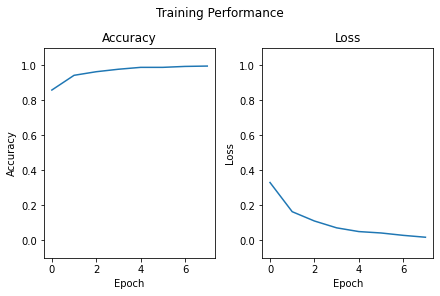

In [ ]:
model_accuracy(xtrain_with_labels, ytrain, modelWithLabels, prediction)
learning_curve(historyWithLabels)

In [ ]:
%%shell
jupyter nbconvert --to html /content/Phase2.ipynb

[NbConvertApp] Converting notebook /content/Phase2.ipynb to html
[NbConvertApp] Writing 461922 bytes to /content/Phase2.html
